<a href="https://colab.research.google.com/github/paciello1899922/CrowdCounting/blob/main/CrowdCounting2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
%matplotlib inline
from matplotlib import cm as CM
import torch
import torchvision
import torchvision.transforms as transforms
from google.colab import drive
from google.colab.patches import cv2_imshow
import scipy.io as io
import PIL.Image as Image
import glob
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler, ConcatDataset
from torchvision import datasets, transforms
from torchvision import utils
import scipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from skimage import transform
import h5py
from typing import List

In [ ]:
!unzip /content/drive/MyDrive/DatasetCrowd/jhu_crowd_v2.0.zip

In [3]:
main_root = '/content/jhu_crowd_v2.0'
test_path = os.path.join(main_root,'test','images')
train_path = os.path.join(main_root,'train','images')
val_path = os.path.join(main_root,'val','images')
path_set = [train_path]


In [4]:
images = [] 
for path in path_set:
  for image in glob.glob(os.path.join(path, '*.jpg')):
    images.append(image)
print(image)

/content/jhu_crowd_v2.0/train/images/0764.jpg


In [30]:
def generate_label(label_info: np.array, image_shape: List[int]):
    """
    Generate a density map based on objects positions.
    Args:
        label_info: (x, y) objects positions
        image_shape: (width, height) of a density map to be generated
    Returns:
        A density map.
    """
    # create an empty density map
    label = np.zeros(image_shape, dtype=np.float32)

    # loop over objects positions and marked them with 100 on a label
    # note: *_ because some datasets contain more info except x, y coordinates
    for x, y, *_ in label_info:
        if y < image_shape[0] and x < image_shape[1]:
            label[int(y)][int(x)] = 1

    # apply a convolution with a Gaussian kernel
    label = scipy.ndimage.gaussian_filter(label, sigma=(1, 1), order=0)

    return label

/content/jhu_crowd_v2.0/train/images/0528.jpg


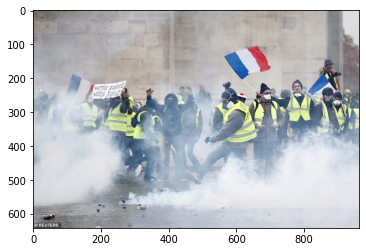

In [6]:
print(images[100])
plt.imshow(Image.open(images[100]))

In [39]:
np.set_printoptions(threshold=np.inf)
images.sort()
for img_path in images:
    
    heads_annotation = img_path.replace('.jpg','.txt').replace('images', 'gt')
    if os.stat(heads_annotation).st_size!=0:
      heads = pd.read_csv(heads_annotation, delimiter=' ', header=None)
    img= plt.imread(img_path)
    print(img.shape)
    k = np.zeros((img.shape[0],img.shape[1]))
    coordinates = []
    for i in range (0,len(heads)):
      if heads.iloc[i,1]<img.shape[0] and heads.iloc[i,0]<img.shape[1]:
        coordinates.append((heads.iloc[i,0],heads.iloc[i,1]))
    k = generate_label(coordinates, k.shape)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','gt'), 'w') as hf:
      hf['density'] = k
    

(513, 730, 3)
(630, 1200, 3)
(1573, 2048, 3)
(2232, 3348, 3)
(400, 600, 3)
(341, 512, 3)
(501, 890, 3)
(685, 1050, 3)
(720, 960, 3)
(853, 1280, 3)
(3632, 5456, 3)
(620, 980, 3)
(608, 962, 3)
(302, 450)
(1080, 1920, 3)
(274, 440, 3)
(305, 1483, 3)
(904, 1315, 3)
(330, 612, 3)
(676, 1200, 3)
(798, 1200, 3)
(682, 1024, 3)
(599, 900, 3)
(563, 1000, 3)
(2325, 3100, 3)
(1583, 2375, 3)
(1080, 1920, 3)
(800, 1200, 3)
(480, 852, 3)
(1993, 3000, 3)
(586, 1200, 3)
(1280, 1920, 3)
(2988, 5312, 3)
(2848, 4288, 3)
(600, 900, 3)
(1356, 2048, 3)
(3280, 4928, 3)
(393, 595, 3)
(781, 1044, 3)
(643, 964, 3)
(424, 640, 3)
(1200, 1200, 3)
(422, 759, 3)
(340, 485, 3)
(733, 1100, 3)
(1668, 2500, 3)
(1151, 2200, 3)
(1134, 1928, 3)
(432, 768, 3)
(2221, 2175, 3)
(483, 724, 3)
(504, 800, 3)
(3024, 4032, 3)
(1308, 1956, 3)
(396, 630, 3)
(1592, 5616, 3)
(480, 720, 3)
(1080, 1920, 3)
(460, 800, 3)
(413, 620, 3)
(412, 550, 3)
(682, 1024, 3)
(470, 931, 3)
(1440, 2160, 3)
(531, 800, 3)
(400, 700, 3)
(405, 660, 3)
(3264

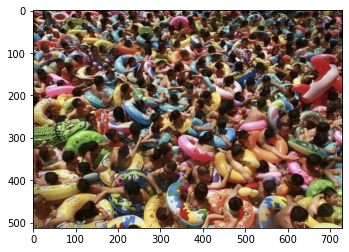

In [40]:
plt.imshow(Image.open(images[0]))

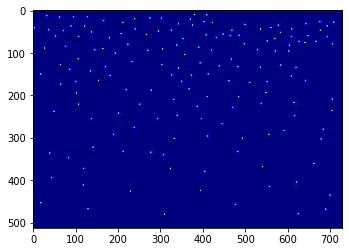

In [41]:
gt_file = h5py.File(images[0].replace('.jpg','.h5').replace('images','gt'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)
gt_file.close()

In [42]:
np.sum(groundtruth)

161.00002